In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import datetime
import random

file = "parking-citations.csv"
parkingdf = pd.read_csv(file)

In [25]:
parkingdf = parkingdf.drop(labels=['Meter Id','Ticket number','Marked Time','Plate Expiry Date','VIN','Route','Agency','Violation code'],axis=1)
parkingdf = parkingdf.replace(to_replace='nan',value=np.nan)
parkingdf = parkingdf.dropna()
datetimelist = []
for item in parkingdf['Issue Date']:
    d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    datetimelist.append(d1)
#adds new column with correct date format into Data Frame
parkingdf['Issue Date'] = datetimelist

In [26]:
dates = parkingdf['Issue Date']
days = []
for item in dates:
    day = item.weekday()
    days.append(day)
parkingdf['Weekday']=days

In [27]:
daygroup = parkingdf.groupby("Weekday")
daydf = daygroup.count()
daydf = daydf.reset_index()
daydf["Weekday"] = daydf['Weekday'].replace(to_replace={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
daydf = daydf.set_index("Weekday")

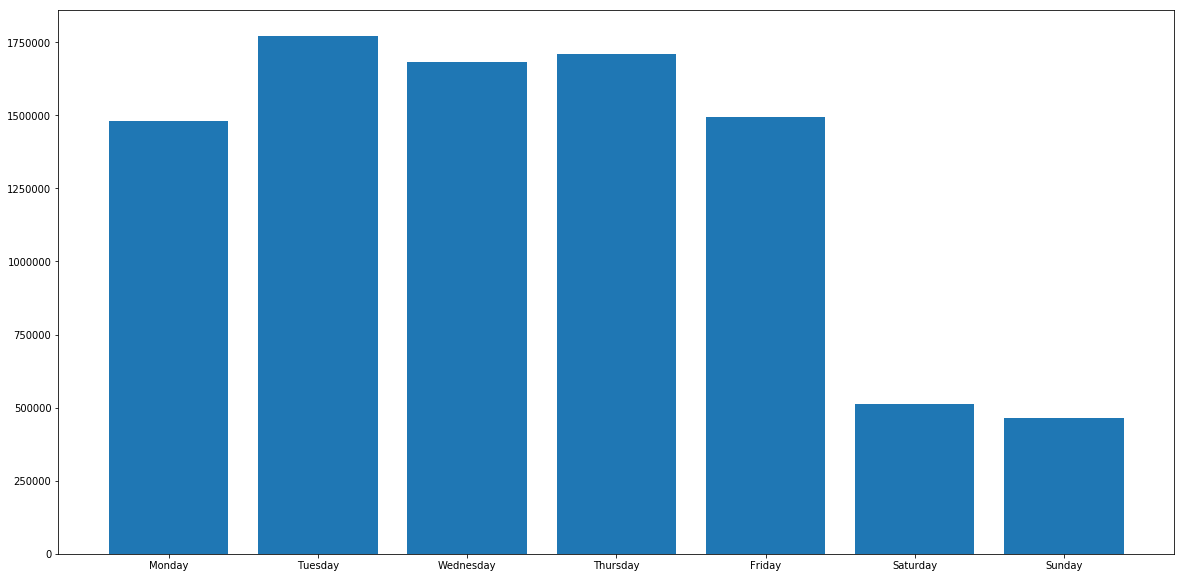

In [28]:
plt.figure(figsize=(20,10))
plt.bar(daydf.index.values,daydf["Issue Date"])
plt.savefig("Output/CitationsByWeekday.png")
plt.show()